In [1]:
%load_ext autoreload
%autoreload 2
import math
import torch
import torch.nn.functional as F

from src.visualize import visualize_fc_weights
from src.utils import standardize
from os.path import join as pjoin

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_init = torch.load(pjoin("good_filters", "fc_adam_act=sigmoid_lr=0.01_bs=500_sig=0.5_epoch=24_tied=True_seed=1.pt"), map_location=device)
model_ft = torch.load(pjoin("finetune_delta=0.5", "fc_adam_act=sigmoid_lr=0.01_bs=500_sig=0.5_epoch=49_tied=True_seed=1.pt"), map_location=device)

/usr/local/linux/anaconda3.8-20.04/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
W0 = model_init["W"]
W1 = model_ft["W"]

delta = 0.5
n, m = W0.shape
Wp = W0 + delta * torch.randn(n, m) / math.pow(m, 0.25)

print(torch.norm(W0 - W1))
print(torch.norm(W0 - Wp))

tensor(32.2879)
tensor(24.6011)


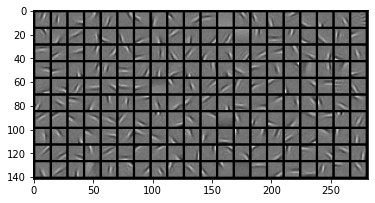

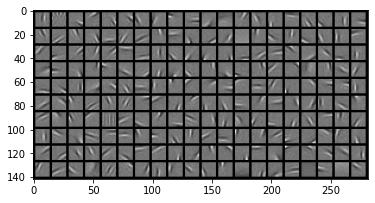

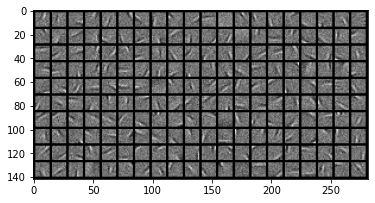

In [4]:
visualize_fc_weights(W0, (12, 12))
visualize_fc_weights(W1, (12, 12))
visualize_fc_weights(Wp, (12, 12))

In [6]:
W0_norm = standardize(W0)
W1_norm = standardize(W1)
Wp_norm = standardize(Wp)

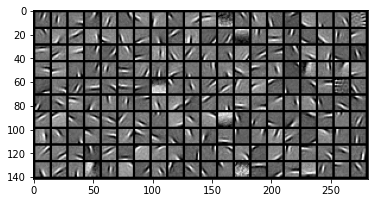

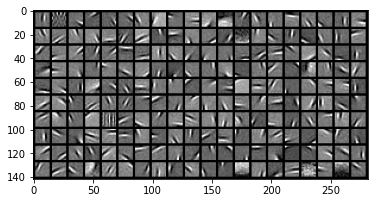

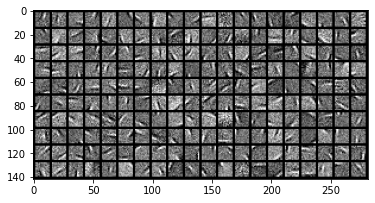

In [7]:
visualize_fc_weights(W0_norm, (12, 12))
visualize_fc_weights(W1_norm, (12, 12))
visualize_fc_weights(Wp_norm, (12, 12))

In [10]:
# all_pairs = torch.cdist(F.normalize(W0_norm), F.normalize(W1_norm))
all_pairs = torch.cdist(W0, W1)
print(torch.max(torch.min(all_pairs, dim=1)[0]))

tensor(2.1427)


In [11]:
# all_pairs = torch.cdist(F.normalize(W0_norm), F.normalize(Wp_norm))
all_pairs = torch.cdist(W0, Wp)
print(torch.max(torch.min(all_pairs, dim=1)[0]))

tensor(2.0158)
